In [1]:
import os
os.chdir("../../")

import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv(os.getcwd() + "/data/text/png/png_business_news.csv").drop("Unnamed: 0", axis=1)

In [8]:
df["date"] = pd.to_datetime(df["date"])

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent_df = pd.DataFrame()
for row in df.news:
    sample = row.replace("\n", " ").strip()
    sid = SentimentIntensityAnalyzer()
    ss = sid.polarity_scores(sample)
    ss_temp = pd.DataFrame(ss, columns=ss.keys(), index=[0])
    sent_df = pd.concat([sent_df, ss_temp], axis=0)

In [12]:
df["score"] = sent_df["compound"].tolist()

<Axes: xlabel='date'>

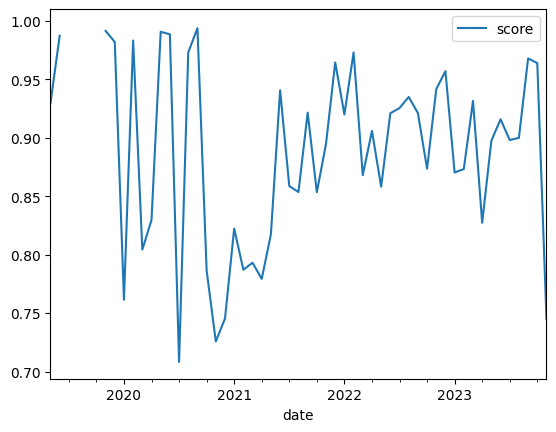

In [17]:
df.set_index("date").groupby(pd.Grouper(freq="MS"))[["score"]].mean().plot()